## Importing libraries

In [1]:
from datetime import datetime
import requests
import json
import pandas as pd

In [2]:
from geopy.distance import geodesic
import numpy as np

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

## Web Scrapping

In [52]:
# Parameters
params = {
    "format": "geojson",
    "starttime": "2020-01-01",
    "endtime": "2025-01-01",
    "minlatitude": 23.5,
    "maxlatitude": 37,
    "minlongitude": 60,
    "maxlongitude": 77,
    "orderby": "time",
    "limit": 20000
}

url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
response = requests.get(url, params=params)
data = response.json()


In [53]:
response.content

b'{"type":"FeatureCollection","metadata":{"generated":1745089464000,"url":"https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2020-01-01&endtime=2025-01-01&minlatitude=23.5&maxlatitude=37&minlongitude=60&maxlongitude=77&orderby=time&limit=20000","title":"USGS Earthquakes","status":200,"api":"1.14.1","limit":20000,"offset":1,"count":1152},"features":[{"type":"Feature","properties":{"mag":4,"place":"15 km SSE of Jurm, Afghanistan","time":1735595334605,"updated":1741473553040,"tz":null,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us6000pgjv","detail":"https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us6000pgjv&format=geojson","felt":null,"cdi":null,"mmi":null,"alert":null,"status":"reviewed","tsunami":0,"sig":246,"net":"us","code":"6000pgjv","ids":",us6000pgjv,","sources":",us,","types":",origin,phase-data,","nst":31,"dmin":2.366,"rms":0.63,"gap":89,"magType":"mb","type":"earthquake","title":"M 4.0 - 15 km SSE of Jurm, Afghanistan"},"geometry":{"

In [ ]:
features = data["features"]
# Initialize lists
ID = []
magnitude = []
location = []
event_occured = []
is_tsunami = []
Type = []
longitude = []
latitude = []
depth = []
status = []
times = []  

# Loop over features and collect fields
for feature in features:
    props = feature["properties"]
    coords = feature["geometry"]["coordinates"]

    ID.append(feature["id"])
    magnitude.append(props["mag"])
    location.append(props["place"])
    is_tsunami.append(props["tsunami"])
    Type.append(props["type"])
    longitude.append(coords[0])
    latitude.append(coords[1])
    depth.append(coords[2])
    status.append(props["tsunami"])  
    times.append(pd.to_datetime(props["time"], unit='ms'))  

# Store in dataframe
data = {
    "ID": ID,
    "Location": location,
    "Magnitude": magnitude,
    "Time": times,  
    "Type": Type,
    "Is_tsunami": is_tsunami,
    "Longitude": longitude,
    "Latitude": latitude,
    "Depth": depth,
    "Status": status
}

df = pd.DataFrame(data)

# Drop NaNs and filter invalid magnitude
df.dropna(inplace=True)
df = df[df["Magnitude"] > 0]
df.reset_index(drop=True, inplace=True)

df.head()


,ID,Location,Magnitude,Time,Type,Is_tsunami,Longitude,Latitude,Depth,Status
0,us6000pgjv,"15 km SSE of Jurm, Afghanistan",4.0,2024-12-30 21:48:54.605,earthquake,0,70.9153,36.7412,224.419,0
1,us6000pgbm,"75 km SSW of Jurm, Afghanistan",4.2,2024-12-29 17:35:41.050,earthquake,0,70.6585,36.1980,114.000,0
2,us6000pgbh,"30 km WSW of Ashkāsham, Afghanistan",4.0,2024-12-29 16:47:55.254,earthquake,0,71.2467,36.5397,223.091,0
3,us6000pg7p,"15 km WNW of Ashkāsham, Afghanistan",4.1,2024-12-29 00:11:38.857,earthquake,0,71.3742,36.7477,143.537,0
4,us6000pg13,"35 km NNE of Chaman, Pakistan",4.7,2024-12-27 22:39:26.804,earthquake,0,66.6548,31.1844,10.000,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          1152 non-null   object        
 1   Location    1152 non-null   object        
 2   Magnitude   1152 non-null   float64       
 3   Time        1152 non-null   datetime64[ns]
 4   Type        1152 non-null   object        
 5   Is_tsunami  1152 non-null   int64         
 6   Longitude   1152 non-null   float64       
 7   Latitude    1152 non-null   float64       
 8   Depth       1152 non-null   float64       
 9   Status      1152 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 90.1+ KB


In [56]:
features

[{'type': 'Feature',
  'properties': {'mag': 4,
   'place': '15 km SSE of Jurm, Afghanistan',
   'time': 1735595334605,
   'updated': 1741473553040,
   'tz': None,
   'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us6000pgjv',
   'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us6000pgjv&format=geojson',
   'felt': None,
   'cdi': None,
   'mmi': None,
   'alert': None,
   'status': 'reviewed',
   'tsunami': 0,
   'sig': 246,
   'net': 'us',
   'code': '6000pgjv',
   'ids': ',us6000pgjv,',
   'sources': ',us,',
   'types': ',origin,phase-data,',
   'nst': 31,
   'dmin': 2.366,
   'rms': 0.63,
   'gap': 89,
   'magType': 'mb',
   'type': 'earthquake',
   'title': 'M 4.0 - 15 km SSE of Jurm, Afghanistan'},
  'geometry': {'type': 'Point', 'coordinates': [70.9153, 36.7412, 224.419]},
  'id': 'us6000pgjv'},
 {'type': 'Feature',
  'properties': {'mag': 4.2,
   'place': '75 km SSW of Jurm, Afghanistan',
   'time': 1735493741050,
   'updated': 1741473552040,
   '

## Data Cleaning

In [57]:
df.drop(['ID', 'Location', 'Is_tsunami', 'Status'], axis=1, inplace=True)

In [58]:
df

,Magnitude,Time,Type,Longitude,Latitude,Depth
0,4.0,2024-12-30 21:48:54.605,earthquake,70.9153,36.7412,224.419
1,4.2,2024-12-29 17:35:41.050,earthquake,70.6585,36.1980,114.000
2,4.0,2024-12-29 16:47:55.254,earthquake,71.2467,36.5397,223.091
3,4.1,2024-12-29 00:11:38.857,earthquake,71.3742,36.7477,143.537
4,4.7,2024-12-27 22:39:26.804,earthquake,66.6548,31.1844,10.000
...,...,...,...,...,...,...
1147,4.2,2020-01-05 18:03:00.488,earthquake,70.7939,36.4993,210.670
1148,4.0,2020-01-04 22:34:22.995,earthquake,66.8822,31.9136,10.000
1149,4.9,2020-01-04 08:24:38.167,earthquake,63.1389,25.4990,10.000
1150,4.3,2020-01-02 10:03:06.225,earthquake,60.4080,34.1629,10.000


## Feature Engineering

In [59]:
def eq_class(input):
    if input >=0.00 and input <=1.99:
        return "Micro"
    if input >=2.00 and input <=3.99:
        return "Minor"
    if input >=4.00 and input <=4.99:
        return "Light"
    if input >=5.00 and input <=5.99:
        return "Moderate"
    if input >=6.00 and input <=6.99:
        return "strong"
    if input >=7.00 and input <=7.99:
        return "Major"
    if input >=8.00 and input <=10.00:
        return "Great"
df["Earthquake_classification"]=df["Magnitude"].apply(lambda x : eq_class(x))
df.head()
    
df

,Magnitude,Time,Type,Longitude,Latitude,Depth,Earthquake_classification
0,4.0,2024-12-30 21:48:54.605,earthquake,70.9153,36.7412,224.419,Light
1,4.2,2024-12-29 17:35:41.050,earthquake,70.6585,36.1980,114.000,Light
2,4.0,2024-12-29 16:47:55.254,earthquake,71.2467,36.5397,223.091,Light
3,4.1,2024-12-29 00:11:38.857,earthquake,71.3742,36.7477,143.537,Light
4,4.7,2024-12-27 22:39:26.804,earthquake,66.6548,31.1844,10.000,Light
...,...,...,...,...,...,...,...
1147,4.2,2020-01-05 18:03:00.488,earthquake,70.7939,36.4993,210.670,Light
1148,4.0,2020-01-04 22:34:22.995,earthquake,66.8822,31.9136,10.000,Light
1149,4.9,2020-01-04 08:24:38.167,earthquake,63.1389,25.4990,10.000,Light
1150,4.3,2020-01-02 10:03:06.225,earthquake,60.4080,34.1629,10.000,Light


In [62]:
# Extract temporal features
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour
df['day_of_week'] = df['Time'].dt.dayofweek
df


,Magnitude,Time,Type,Longitude,Latitude,Depth,Earthquake_classification,year,month,day,hour,day_of_week
0,4.0,2024-12-30 21:48:54.605,earthquake,70.9153,36.7412,224.419,Light,2024,12,30,21,0
1,4.2,2024-12-29 17:35:41.050,earthquake,70.6585,36.1980,114.000,Light,2024,12,29,17,6
2,4.0,2024-12-29 16:47:55.254,earthquake,71.2467,36.5397,223.091,Light,2024,12,29,16,6
3,4.1,2024-12-29 00:11:38.857,earthquake,71.3742,36.7477,143.537,Light,2024,12,29,0,6
4,4.7,2024-12-27 22:39:26.804,earthquake,66.6548,31.1844,10.000,Light,2024,12,27,22,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,4.2,2020-01-05 18:03:00.488,earthquake,70.7939,36.4993,210.670,Light,2020,1,5,18,6
1148,4.0,2020-01-04 22:34:22.995,earthquake,66.8822,31.9136,10.000,Light,2020,1,4,22,5
1149,4.9,2020-01-04 08:24:38.167,earthquake,63.1389,25.4990,10.000,Light,2020,1,4,8,5
1150,4.3,2020-01-02 10:03:06.225,earthquake,60.4080,34.1629,10.000,Light,2020,1,2,10,3


In [ ]:
# Reference location (center of Pakistan)
lat = 30.3753
long = 69.3451
radius = 1435.5  # in km
reference_location = (lat, long)

df.rename(columns={"Latitude": "latitude", "Longitude": "longitude"}, inplace=True)

# Calculate distance from each earthquake to Pakistan's center
df['distance_from_pakistan'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), reference_location).kilometers, axis=1
)

# Filter earthquakes near Pakistan (within given radius)
earthquakes_near_pakistan = df[df['distance_from_pakistan'] <= radius]

# Initialize lists for seismic features
activity_counts = []
avg_mag_nearby = []
depth_std_nearby = []

for idx, row in df.iterrows():
    current_point = (row["latitude"], row["longitude"])
    current_time = row["Time"]

    # Filter previous earthquakes within 30 days and 100 km
    recent_df = df[(df["Time"] < current_time) &
                   (df["Time"] > current_time - pd.Timedelta(days=30))]

    def is_near(point):
     return geodesic(current_point, (point["latitude"], point["longitude"])).km <= 100


    nearby = recent_df[recent_df.apply(is_near, axis=1)]

    activity_counts.append(len(nearby))
    avg_mag_nearby.append(nearby["Magnitude"].mean() if not nearby.empty else 0)
    depth_std_nearby.append(nearby["Depth"].std() if not nearby.empty else 0)

df["activity_count_30d_100km"] = activity_counts
df["avg_mag_30d_100km"] = avg_mag_nearby
df["depth_std_30d_100km"] = depth_std_nearby

df.fillna(0, inplace=True)
df.head()


,Magnitude,Time,Type,longitude,latitude,Depth,Earthquake_classification,year,month,day,hour,day_of_week,distance_from_pakistan,activity_count_30d_100km,avg_mag_30d_100km,depth_std_30d_100km
0,4.0,2024-12-30 21:48:54.605,earthquake,70.9153,36.7412,224.419,Light,2024,12,30,21,0,720.935707,10,4.240000,52.200620
1,4.2,2024-12-29 17:35:41.050,earthquake,70.6585,36.1980,114.000,Light,2024,12,29,17,6,657.259271,9,4.244444,52.832085
2,4.0,2024-12-29 16:47:55.254,earthquake,71.2467,36.5397,223.091,Light,2024,12,29,16,6,706.148728,8,4.275000,51.155779
3,4.1,2024-12-29 00:11:38.857,earthquake,71.3742,36.7477,143.537,Light,2024,12,29,0,6,731.418240,7,4.300000,54.989918
4,4.7,2024-12-27 22:39:26.804,earthquake,66.6548,31.1844,10.000,Light,2024,12,27,22,4,272.688881,0,0.000000,0.000000


## Data Transformation

In [73]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns for encoding
categorical_cols = ['Type', 'Earthquake_classification']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


# Fit and transform the encoder on the categorical columns
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data with column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded DataFrame with the original DataFrame
data_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)


In [74]:
data_encoded

,Magnitude,Time,longitude,latitude,Depth,year,month,day,hour,day_of_week,distance_from_pakistan,activity_count_30d_100km,avg_mag_30d_100km,depth_std_30d_100km,Type_earthquake,Earthquake_classification_Light,Earthquake_classification_Minor,Earthquake_classification_Moderate,Earthquake_classification_strong
0,4.0,2024-12-30 21:48:54.605,70.9153,36.7412,224.419,2024,12,30,21,0,720.935707,10,4.240000,52.200620,1.0,1.0,0.0,0.0,0.0
1,4.2,2024-12-29 17:35:41.050,70.6585,36.1980,114.000,2024,12,29,17,6,657.259271,9,4.244444,52.832085,1.0,1.0,0.0,0.0,0.0
2,4.0,2024-12-29 16:47:55.254,71.2467,36.5397,223.091,2024,12,29,16,6,706.148728,8,4.275000,51.155779,1.0,1.0,0.0,0.0,0.0
3,4.1,2024-12-29 00:11:38.857,71.3742,36.7477,143.537,2024,12,29,0,6,731.418240,7,4.300000,54.989918,1.0,1.0,0.0,0.0,0.0
4,4.7,2024-12-27 22:39:26.804,66.6548,31.1844,10.000,2024,12,27,22,4,272.688881,0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,4.2,2020-01-05 18:03:00.488,70.7939,36.4993,210.670,2020,1,5,18,6,692.432346,0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
1148,4.0,2020-01-04 22:34:22.995,66.8822,31.9136,10.000,2020,1,4,22,5,290.240933,0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
1149,4.9,2020-01-04 08:24:38.167,63.1389,25.4990,10.000,2020,1,4,8,5,815.234292,0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
1150,4.3,2020-01-02 10:03:06.225,60.4080,34.1629,10.000,2020,1,2,10,3,940.440911,1,5.500000,0.000000,1.0,1.0,0.0,0.0,0.0


In [77]:
# Normalization
scaler = MinMaxScaler()
data_encoded[[ 'latitude', 'longitude','Depth',"activity_count_30d_100km",
        "avg_mag_30d_100km", "depth_std_30d_100km"]] = scaler.fit_transform(data_encoded[[ 'latitude', 'longitude','Depth',"activity_count_30d_100km",
        "avg_mag_30d_100km", "depth_std_30d_100km"]])


In [78]:
data_encoded

,Magnitude,Time,longitude,latitude,Depth,year,month,day,hour,day_of_week,distance_from_pakistan,activity_count_30d_100km,avg_mag_30d_100km,depth_std_30d_100km,Type_earthquake,Earthquake_classification_Light,Earthquake_classification_Minor,Earthquake_classification_Moderate,Earthquake_classification_strong
0,4.0,2024-12-30 21:48:54.605,0.641144,0.980943,0.744284,2024,12,30,21,0,720.935707,0.196078,0.673016,0.397452,1.0,1.0,0.0,0.0,0.0
1,4.2,2024-12-29 17:35:41.050,0.625988,0.940442,0.371435,2024,12,29,17,6,657.259271,0.176471,0.673721,0.402260,1.0,1.0,0.0,0.0,0.0
2,4.0,2024-12-29 16:47:55.254,0.660702,0.965919,0.739800,2024,12,29,16,6,706.148728,0.156863,0.678571,0.389497,1.0,1.0,0.0,0.0,0.0
3,4.1,2024-12-29 00:11:38.857,0.668227,0.981427,0.471172,2024,12,29,0,6,731.418240,0.137255,0.682540,0.418690,1.0,1.0,0.0,0.0,0.0
4,4.7,2024-12-27 22:39:26.804,0.389699,0.566633,0.020260,2024,12,27,22,4,272.688881,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,4.2,2020-01-05 18:03:00.488,0.633979,0.962907,0.697858,2020,1,5,18,6,692.432346,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
1148,4.0,2020-01-04 22:34:22.995,0.403120,0.621002,0.020260,2020,1,4,22,5,290.240933,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
1149,4.9,2020-01-04 08:24:38.167,0.182199,0.142736,0.020260,2020,1,4,8,5,815.234292,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
1150,4.3,2020-01-02 10:03:06.225,0.021028,0.788707,0.020260,2020,1,2,10,3,940.440911,0.019608,0.873016,0.000000,1.0,1.0,0.0,0.0,0.0


In [79]:
# Convert float64 columns to float32
float64_cols = data_encoded.select_dtypes(include=['float64']).columns
data_encoded[float64_cols] = data_encoded[float64_cols].astype('float32')

# Convert int64 columns to int32
int64_cols = data_encoded.select_dtypes(include=['int64']).columns
data_encoded[int64_cols] = data_encoded[int64_cols].astype('int32')

In [80]:
df.to_csv("C:\\Users\\city\\OneDrive\\Desktop\\my\\Intro to data science\\USGS_earthquake_datasource.csv")

In [81]:
data_encoded.to_csv("C:\\Users\\city\\OneDrive\\Desktop\\my\\Intro to data science\\preprocessed_earthquake_data.csv", index=False)

## Exploratory Data Analysis

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

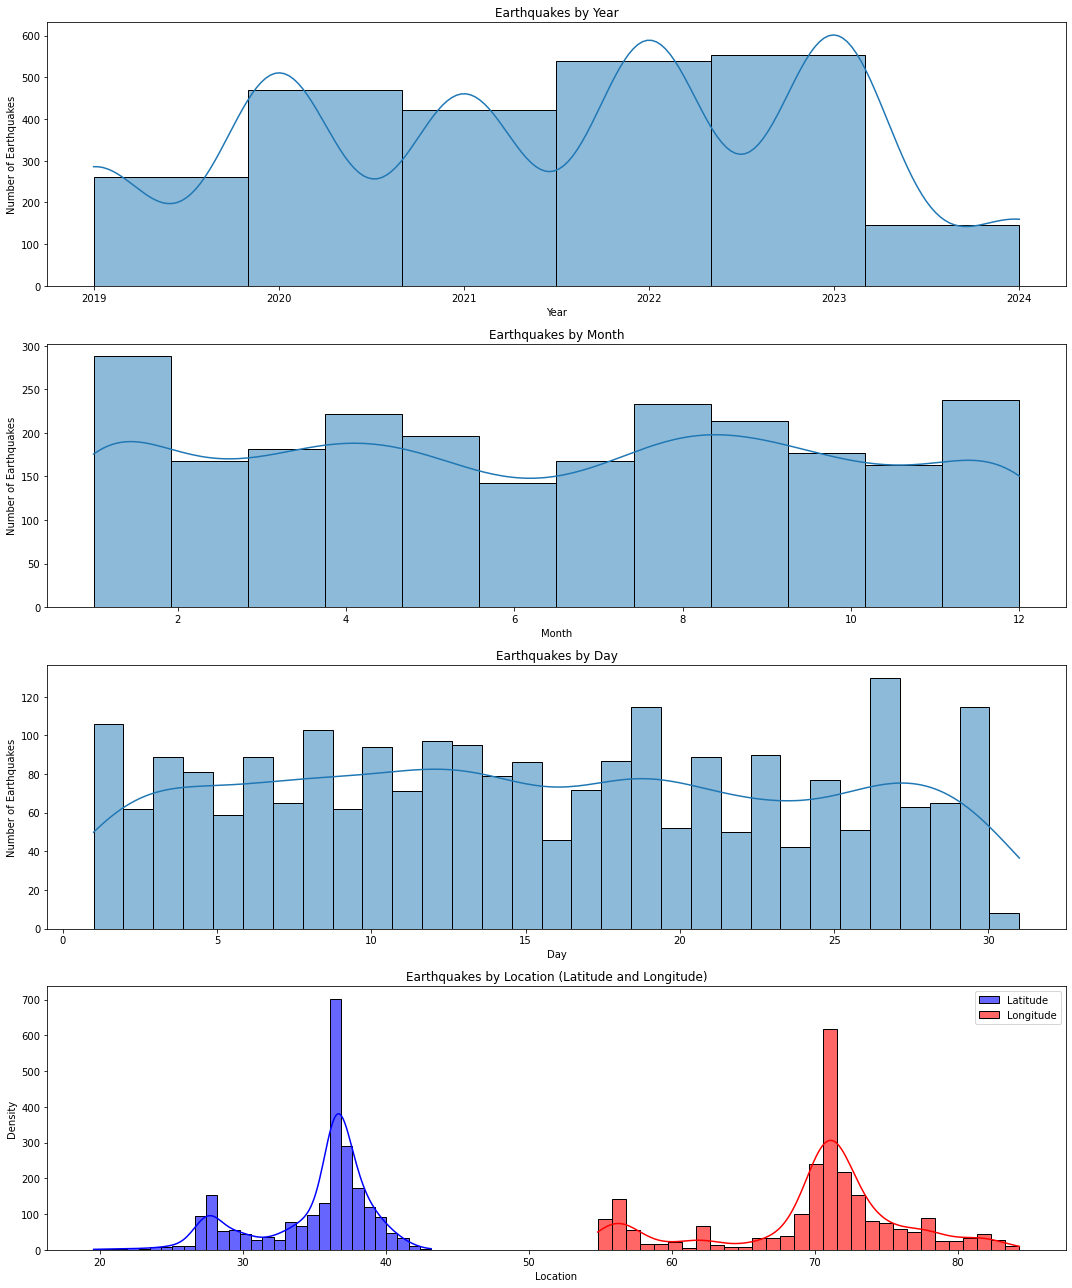

In [ ]:
# Group data by year, month, and day
earthquakes_by_year = df.groupby(df['Time'].dt.year).size()
earthquakes_by_month = df.groupby(df['Time'].dt.month).size()
earthquakes_by_day = df.groupby(df['Time'].dt.day).size()
# Plotting
plt.figure(figsize=(15, 18))

plt.subplot(4, 1, 1)
sns.histplot(df['Time'].dt.year, kde=True, bins=len(earthquakes_by_year))
plt.title('Earthquakes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')

plt.subplot(4, 1, 2)
sns.histplot(df['Time'].dt.month, kde=True, bins=12)
plt.title('Earthquakes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')

plt.subplot(4, 1, 3)
sns.histplot(df['Time'].dt.day, kde=True, bins=31)
plt.title('Earthquakes by Day')
plt.xlabel('Day')
plt.ylabel('Number of Earthquakes')

plt.subplot(4, 1, 4)
sns.histplot(df['latitude'], kde=True, bins=30, color='blue', label='latitude', alpha=0.6)
sns.histplot(df['longitude'], kde=True, bins=30, color='red', label='longitude', alpha=0.6)
plt.title('Earthquakes by Location (Latitude and Longitude)')
plt.xlabel('Location')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


<AxesSubplot:>

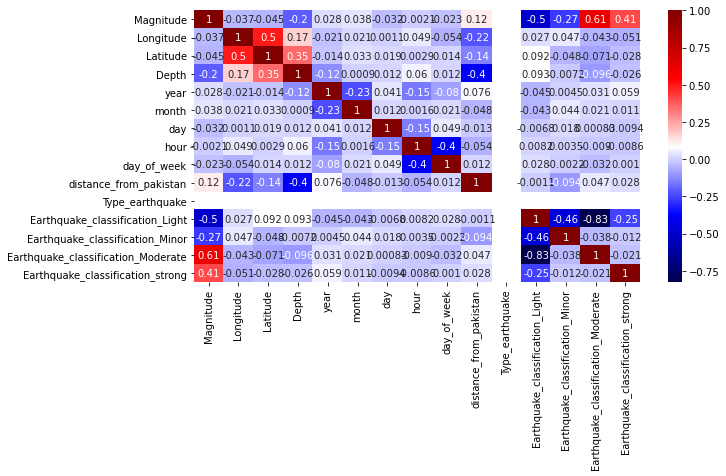

In [19]:
# Finding the relations between the variables.
plt.figure(figsize=(10,5))
c= data_encoded.corr() #correlation function
sns.heatmap(c,annot=True,cmap='seismic')

In [21]:
# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Extract correlation values with the target variable
target_variable = 'Earthquake_classification_Light'  
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)

print(correlation_with_target)


Earthquake_classification_Light       1.000000
Earthquake_classification_Moderate    0.827076
Magnitude                             0.498951
Earthquake_classification_Minor       0.459088
Earthquake_classification_strong      0.249593
Depth                                 0.092808
Latitude                              0.091795
year                                  0.044528
month                                 0.042863
day_of_week                           0.028206
Longitude                             0.027267
hour                                  0.008247
day                                   0.006816
distance_from_pakistan                0.001097
Type_earthquake                            NaN
Name: Earthquake_classification_Light, dtype: float64


In [22]:
# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Extract correlation values with the target variable
target_variable = 'Magnitude' 
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)

print(correlation_with_target)


Magnitude                             1.000000
Earthquake_classification_Moderate    0.610688
Earthquake_classification_Light       0.498951
Earthquake_classification_strong      0.408667
Earthquake_classification_Minor       0.268456
Depth                                 0.201344
distance_from_pakistan                0.118351
Latitude                              0.045053
month                                 0.038202
Longitude                             0.036742
day                                   0.031879
year                                  0.028364
day_of_week                           0.022991
hour                                  0.002133
Type_earthquake                            NaN
Name: Magnitude, dtype: float64


In [23]:
# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Extract correlation values with the target variable
target_variable = 'distance_from_pakistan'  
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)

print(correlation_with_target)


distance_from_pakistan                1.000000
Depth                                 0.401926
Longitude                             0.216245
Latitude                              0.138695
Magnitude                             0.118351
Earthquake_classification_Minor       0.094073
year                                  0.075690
hour                                  0.054040
month                                 0.047995
Earthquake_classification_Moderate    0.047030
Earthquake_classification_strong      0.027839
day                                   0.012919
day_of_week                           0.012435
Earthquake_classification_Light       0.001097
Type_earthquake                            NaN
Name: distance_from_pakistan, dtype: float64


In [24]:
# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Extract correlation values with the target variable
target_variable = 'Earthquake_classification_Minor' 
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)

print(correlation_with_target)


Earthquake_classification_Minor       1.000000
Earthquake_classification_Light       0.459088
Magnitude                             0.268456
distance_from_pakistan                0.094073
Latitude                              0.047551
Longitude                             0.046506
month                                 0.044430
Earthquake_classification_Moderate    0.038495
day                                   0.017525
Earthquake_classification_strong      0.011617
Depth                                 0.007218
year                                  0.004489
hour                                  0.003479
day_of_week                           0.002247
Type_earthquake                            NaN
Name: Earthquake_classification_Minor, dtype: float64


In [25]:
# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Extract correlation values with the target variable
target_variable = 'Earthquake_classification_Moderate'  
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)

print(correlation_with_target)


Earthquake_classification_Moderate    1.000000
Earthquake_classification_Light       0.827076
Magnitude                             0.610688
Depth                                 0.096341
Latitude                              0.071030
distance_from_pakistan                0.047030
Longitude                             0.042544
Earthquake_classification_Minor       0.038495
day_of_week                           0.032129
year                                  0.030815
month                                 0.021109
Earthquake_classification_strong      0.020929
hour                                  0.008950
day                                   0.000833
Type_earthquake                            NaN
Name: Earthquake_classification_Moderate, dtype: float64


In [26]:
# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Extract correlation values with the target variable
target_variable = 'Earthquake_classification_strong' 
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)

print(correlation_with_target)


Earthquake_classification_strong      1.000000
Magnitude                             0.408667
Earthquake_classification_Light       0.249593
year                                  0.058776
Longitude                             0.051429
Latitude                              0.028364
distance_from_pakistan                0.027839
Depth                                 0.026235
Earthquake_classification_Moderate    0.020929
Earthquake_classification_Minor       0.011617
month                                 0.010564
day                                   0.009403
hour                                  0.008584
day_of_week                           0.001009
Type_earthquake                            NaN
Name: Earthquake_classification_strong, dtype: float64


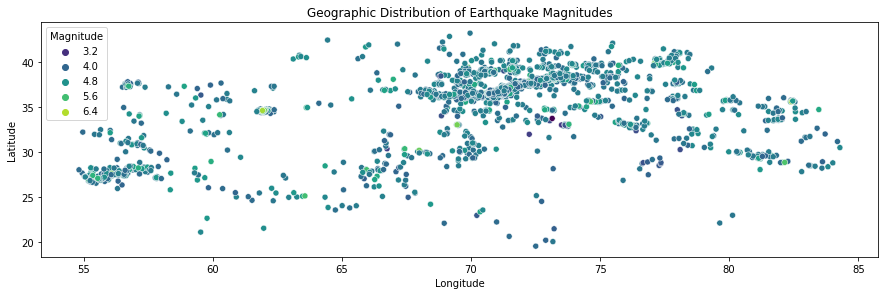

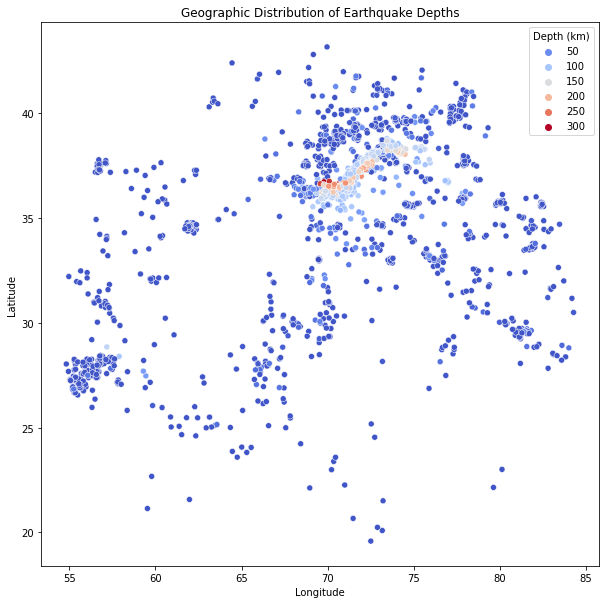

In [ ]:
# Plotting
plt.figure(figsize=(15, 25))
# Magnitude vs. Latitude and Longitude
plt.subplot(5, 1, 2)
sns.scatterplot(x='longitude', y='latitude', hue='Magnitude', palette='viridis', data=df)
plt.title('Geographic Distribution of Earthquake Magnitudes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude')

# Additional Plot for Depth vs. Latitude and Longitude
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='Depth', palette='coolwarm', data=df)
plt.title('Geographic Distribution of Earthquake Depths')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Depth (km)')
plt.show()


## Splitting into test and train

In [83]:
from sklearn.model_selection import train_test_split
# Define features (all columns except the target variables)
features = data_encoded.drop(columns=[
    'Earthquake_classification_Light', 'Earthquake_classification_Minor', 
    'Earthquake_classification_Moderate', 'Earthquake_classification_strong', 
    'Magnitude', 'distance_from_pakistan', 'Time', 'Type_earthquake',
    'year', 'month', 'day', 'hour','day_of_week'
])

# Define target variables
target_classification = data_encoded[['Earthquake_classification_Light', 'Earthquake_classification_Minor', 'Earthquake_classification_Moderate', 'Earthquake_classification_strong']]
target_magnitude = data_encoded['Magnitude']
target_distance = data_encoded['distance_from_pakistan']
target_time = data_encoded[['year', 'month', 'day', 'hour','day_of_week']]

# Split the data into training and testing sets for each target variable
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(features, target_classification, test_size=0.2, random_state=42)
X_train_magnitude, X_test_magnitude, y_train_magnitude, y_test_magnitude = train_test_split(features, target_magnitude, test_size=0.2, random_state=42)
X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(features, target_distance, test_size=0.2, random_state=42)
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(features, target_time, test_size=0.2, random_state=42)

# Print the shapes of the splits to verify
print("Classification target: Train shape:", X_train_classification.shape, "Test shape:", X_test_classification.shape)
print("Magnitude target: Train shape:", X_train_magnitude.shape, "Test shape:", X_test_magnitude.shape)
print("Distance target: Train shape:", X_train_distance.shape, "Test shape:", X_test_distance.shape)
print("Time target: Train shape:", X_train_time.shape, "Test shape:", X_test_time.shape)
# Convert target variables for classification to 1-dimensional if needed
# In its most basic type, SVM doesn't support multiclass classification.
# However, to predict individual columns we can use individual classifiers for each
y_train_classification_light = y_train_classification['Earthquake_classification_Light']
y_train_classification_minor = y_train_classification['Earthquake_classification_Minor']
y_train_classification_moderate = y_train_classification['Earthquake_classification_Moderate']
y_train_classification_strong = y_train_classification['Earthquake_classification_strong']

y_test_classification_light = y_test_classification['Earthquake_classification_Light']
y_test_classification_minor = y_test_classification['Earthquake_classification_Minor']
y_test_classification_moderate = y_test_classification['Earthquake_classification_Moderate']
y_test_classification_strong = y_test_classification['Earthquake_classification_strong']

# For Time target, you may want to predict each time component separately
y_train_year = y_train_time['year']
y_train_month = y_train_time['month']
y_train_day = y_train_time['day']
y_train_hour = y_train_time['hour']
y_train_day_of_week = y_train_time['day_of_week']

y_test_year = y_test_time['year']
y_test_month = y_test_time['month']
y_test_day = y_test_time['day']
y_test_hour = y_test_time['hour']
y_test_day_of_week = y_test_time['day_of_week']




Classification target: Train shape: (921, 6) Test shape: (231, 6)
Magnitude target: Train shape: (921, 6) Test shape: (231, 6)
Distance target: Train shape: (921, 6) Test shape: (231, 6)
Time target: Train shape: (921, 6) Test shape: (231, 6)


## Applying KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score

# KNN for Classification
knn_classifier_light = KNeighborsClassifier()
knn_classifier_light.fit(X_train_classification, y_train_classification_light)
y_pred_classification_knn_light = knn_classifier_light.predict(X_test_classification)

knn_classifier_minor = KNeighborsClassifier()
knn_classifier_minor.fit(X_train_classification, y_train_classification_minor)
y_pred_classification_knn_minor = knn_classifier_minor.predict(X_test_classification)

knn_classifier_moderate = KNeighborsClassifier()
knn_classifier_moderate.fit(X_train_classification, y_train_classification_moderate)
y_pred_classification_knn_moderate = knn_classifier_moderate.predict(X_test_classification)

knn_classifier_strong = KNeighborsClassifier()
knn_classifier_strong.fit(X_train_classification, y_train_classification_strong)
y_pred_classification_knn_strong = knn_classifier_strong.predict(X_test_classification)

print("KNN Light Accuracy:", accuracy_score(y_test_classification_light, y_pred_classification_knn_light))
print("KNN Minor Accuracy:", accuracy_score(y_test_classification_minor, y_pred_classification_knn_minor))
print("KNN Moderate Accuracy:", accuracy_score(y_test_classification_moderate, y_pred_classification_knn_moderate))
print("KNN Strong Accuracy:", accuracy_score(y_test_classification_strong, y_pred_classification_knn_strong))

# KNN for magnitude
knn_regressor_magnitude = KNeighborsRegressor()
knn_regressor_magnitude.fit(X_train_magnitude, y_train_magnitude)
y_pred_magnitude_knn = knn_regressor_magnitude.predict(X_test_magnitude)
mse_knn_magnitude = mean_squared_error(y_test_magnitude, y_pred_magnitude_knn)
print("KNN Magnitude MSE:", mse_knn_magnitude)

# KNN for distance
knn_regressor_distance = KNeighborsRegressor()
knn_regressor_distance.fit(X_train_distance, y_train_distance)
y_pred_distance_knn = knn_regressor_distance.predict(X_test_distance)
mse_knn_distance = mean_squared_error(y_test_distance, y_pred_distance_knn)
print("KNN Distance MSE:", mse_knn_distance)

# KNN for time (year, month, day, hour)
# Year
knn_regressor_year = KNeighborsRegressor()
knn_regressor_year.fit(X_train_time, y_train_year)
y_pred_year_knn = knn_regressor_year.predict(X_test_time)

# Month
knn_regressor_month = KNeighborsRegressor()
knn_regressor_month.fit(X_train_time, y_train_month)
y_pred_month_knn = knn_regressor_month.predict(X_test_time)

# Day
knn_regressor_day = KNeighborsRegressor()
knn_regressor_day.fit(X_train_time, y_train_day)
y_pred_day_knn = knn_regressor_day.predict(X_test_time)

# Hour
knn_regressor_hour = KNeighborsRegressor()
knn_regressor_hour.fit(X_train_time, y_train_hour)
y_pred_hour_knn = knn_regressor_hour.predict(X_test_time)

# Day_of_week
knn_regressor_day_of_week = KNeighborsRegressor()
knn_regressor_day_of_week.fit(X_train_time, y_train_day_of_week)
y_pred_day_of_week_knn = knn_regressor_day_of_week.predict(X_test_time)

# Evaluate the Time models
print("KNN Year MSE:", mean_squared_error(y_test_year, y_pred_year_knn))
print("KNN Month MSE:", mean_squared_error(y_test_month, y_pred_month_knn))
print("KNN Day MSE:", mean_squared_error(y_test_day, y_pred_day_knn))
print("KNN Hour MSE:", mean_squared_error(y_test_hour, y_pred_hour_knn))
print("KNN Day_of_week MSE:", mean_squared_error(y_test_hour, y_pred_day_of_week_knn))

# Calculate precision, recall, and f1-score for classification
precision_light = precision_score(y_test_classification_light, y_pred_classification_knn_light, average='weighted')
recall_light = recall_score(y_test_classification_light, y_pred_classification_knn_light, average='weighted')
f1_light = f1_score(y_test_classification_light, y_pred_classification_knn_light, average='weighted')

precision_minor = precision_score(y_test_classification_minor, y_pred_classification_knn_minor, average='weighted')
recall_minor = recall_score(y_test_classification_minor, y_pred_classification_knn_minor, average='weighted')
f1_minor = f1_score(y_test_classification_minor, y_pred_classification_knn_minor, average='weighted')

precision_moderate = precision_score(y_test_classification_moderate, y_pred_classification_knn_moderate, average='weighted')
recall_moderate = recall_score(y_test_classification_moderate, y_pred_classification_knn_moderate, average='weighted')
f1_moderate = f1_score(y_test_classification_moderate, y_pred_classification_knn_moderate, average='weighted')

precision_strong = precision_score(y_test_classification_strong, y_pred_classification_knn_strong, average='weighted')
recall_strong = recall_score(y_test_classification_strong, y_pred_classification_knn_strong, average='weighted')
f1_strong = f1_score(y_test_classification_strong, y_pred_classification_knn_strong, average='weighted')

print("KNN Light Precision:", precision_light)
print("KNN Light Recall:", recall_light)
print("KNN Light F1-score:", f1_light)

print("KNN Minor Precision:", precision_minor)
print("KNN Minor Recall:", recall_minor)
print("KNN Minor F1-score:", f1_minor)

print("KNN Moderate Precision:", precision_moderate)
print("KNN Moderate Recall:", recall_moderate)
print("KNN Moderate F1-score:", f1_moderate)

print("KNN Strong Precision:", precision_strong)
print("KNN Strong Recall:", recall_strong)
print("KNN Strong F1-score:", f1_strong)


KNN Light Accuracy: 0.8961038961038961
KNN Minor Accuracy: 0.974025974025974
KNN Moderate Accuracy: 0.9437229437229437
KNN Strong Accuracy: 0.987012987012987
KNN Magnitude MSE: 0.17133337
KNN Distance MSE: 906.83417
KNN Year MSE: 1.9425108225108403
KNN Month MSE: 13.369177489177488
KNN Day MSE: 88.47774891774893
KNN Hour MSE: 53.30303030303031
KNN Day_of_week MSE: 114.52
KNN Light Precision: 0.8329423880084673
KNN Light Recall: 0.8961038961038961
KNN Light F1-score: 0.8633695072051236
KNN Minor Precision: 0.9487265980772475
KNN Minor Recall: 0.974025974025974
KNN Minor F1-score: 0.9612098427887902
KNN Moderate Precision: 0.9066333957163651
KNN Moderate Recall: 0.9437229437229437
KNN Moderate F1-score: 0.9248064481917488
KNN Strong Precision: 0.9741946365322989
KNN Strong Recall: 0.987012987012987
KNN Strong F1-score: 0.9805619217383923


c:\Users\city\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\city\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Applying DecisionTree

In [85]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Decision Tree for Classification
tree_classifier_light = DecisionTreeClassifier()
tree_classifier_light.fit(X_train_classification, y_train_classification_light)
y_pred_classification_tree_light = tree_classifier_light.predict(X_test_classification)

tree_classifier_minor = DecisionTreeClassifier()
tree_classifier_minor.fit(X_train_classification, y_train_classification_minor)
y_pred_classification_tree_minor = tree_classifier_minor.predict(X_test_classification)

tree_classifier_moderate = DecisionTreeClassifier()
tree_classifier_moderate.fit(X_train_classification, y_train_classification_moderate)
y_pred_classification_tree_moderate = tree_classifier_moderate.predict(X_test_classification)

tree_classifier_strong = DecisionTreeClassifier()
tree_classifier_strong.fit(X_train_classification, y_train_classification_strong)
y_pred_classification_tree_strong = tree_classifier_strong.predict(X_test_classification)

print("Decision Tree Light Accuracy:", accuracy_score(y_test_classification_light, y_pred_classification_tree_light))
print("Decision Tree Minor Accuracy:", accuracy_score(y_test_classification_minor, y_pred_classification_tree_minor))
print("Decision Tree Moderate Accuracy:", accuracy_score(y_test_classification_moderate, y_pred_classification_tree_moderate))
print("Decision Tree Strong Accuracy:", accuracy_score(y_test_classification_strong, y_pred_classification_tree_strong))

# Decision Tree for magnitude
dt_regressor_magnitude = DecisionTreeRegressor()
dt_regressor_magnitude.fit(X_train_magnitude, y_train_magnitude)
y_pred_magnitude_dt = dt_regressor_magnitude.predict(X_test_magnitude)
mse_dt_magnitude = mean_squared_error(y_test_magnitude, y_pred_magnitude_dt)
print("Decision Tree Magnitude MSE:", mse_dt_magnitude)

# Decision Tree for distance
dt_regressor_distance = DecisionTreeRegressor()
dt_regressor_distance.fit(X_train_distance, y_train_distance)
y_pred_distance_dt = dt_regressor_distance.predict(X_test_distance)
mse_dt_distance = mean_squared_error(y_test_distance, y_pred_distance_dt)
print("Decision Tree Distance MSE:", mse_dt_distance)

# Decision Tree for time (year, month, day, hour)
# Year
dt_regressor_year = DecisionTreeRegressor()
dt_regressor_year.fit(X_train_time, y_train_year)
y_pred_year_dt = dt_regressor_year.predict(X_test_time)

# Month
dt_regressor_month = DecisionTreeRegressor()
dt_regressor_month.fit(X_train_time, y_train_month)
y_pred_month_dt = dt_regressor_month.predict(X_test_time)

# Day
dt_regressor_day = DecisionTreeRegressor()
dt_regressor_day.fit(X_train_time, y_train_day)
y_pred_day_dt = dt_regressor_day.predict(X_test_time)

# Hour
dt_regressor_hour = DecisionTreeRegressor()
dt_regressor_hour.fit(X_train_time, y_train_hour)
y_pred_hour_dt = dt_regressor_hour.predict(X_test_time)

# Day_of_week
dt_regressor_day_of_week = DecisionTreeRegressor()
dt_regressor_day_of_week.fit(X_train_time, y_train_day_of_week)
y_pred_day_of_week_dt = dt_regressor_day_of_week.predict(X_test_time)

# Evaluate the Time models
print("Decision Tree Year MSE:", mean_squared_error(y_test_year, y_pred_year_dt))
print("Decision Tree Month MSE:", mean_squared_error(y_test_month, y_pred_month_dt))
print("Decision Tree Day MSE:", mean_squared_error(y_test_day, y_pred_day_dt))
print("Decision Tree Hour MSE:", mean_squared_error(y_test_hour, y_pred_hour_dt))
print("Decision Tree Day_of_week MSE:", mean_squared_error(y_test_hour, y_pred_day_of_week_dt))

# Calculate precision, recall, and f1-score for classification
precision_light = precision_score(y_test_classification_light, y_pred_classification_tree_light, average='weighted')
recall_light = recall_score(y_test_classification_light, y_pred_classification_tree_light, average='weighted')
f1_light = f1_score(y_test_classification_light, y_pred_classification_tree_light, average='weighted')

precision_minor = precision_score(y_test_classification_minor, y_pred_classification_tree_minor, average='weighted')
recall_minor = recall_score(y_test_classification_minor, y_pred_classification_tree_minor, average='weighted')
f1_minor = f1_score(y_test_classification_minor, y_pred_classification_tree_minor, average='weighted')

precision_moderate = precision_score(y_test_classification_moderate, y_pred_classification_tree_moderate, average='weighted')
recall_moderate = recall_score(y_test_classification_moderate, y_pred_classification_tree_moderate, average='weighted')
f1_moderate = f1_score(y_test_classification_moderate, y_pred_classification_tree_moderate, average='weighted')

precision_strong = precision_score(y_test_classification_strong, y_pred_classification_tree_strong, average='weighted')
recall_strong = recall_score(y_test_classification_strong, y_pred_classification_tree_strong, average='weighted')
f1_strong = f1_score(y_test_classification_strong, y_pred_classification_tree_strong, average='weighted')

print("Decision Tree Light Precision:", precision_light)
print("Decision Tree Light Recall:", recall_light)
print("Decision Tree Light F1-score:", f1_light)

print("Decision Tree Minor Precision:", precision_minor)
print("Decision Tree Minor Recall:", recall_minor)
print("Decision Tree Minor F1-score:", f1_minor)

print("Decision Tree Moderate Precision:", precision_moderate)
print("Decision Tree Moderate Recall:", recall_moderate)
print("Decision Tree Moderate F1-score:", f1_moderate)

print("Decision Tree Strong Precision:", precision_strong)
print("Decision Tree Strong Recall:", recall_strong)
print("Decision Tree Strong F1-score:", f1_strong)


Decision Tree Light Accuracy: 0.8311688311688312
Decision Tree Minor Accuracy: 0.9696969696969697
Decision Tree Moderate Accuracy: 0.8961038961038961
Decision Tree Strong Accuracy: 0.987012987012987
Decision Tree Magnitude MSE: 0.24705632230424232
Decision Tree Distance MSE: 352.3633034141811
Decision Tree Year MSE: 3.688311688311688
Decision Tree Month MSE: 18.72294372294372
Decision Tree Day MSE: 140.42857142857142
Decision Tree Hour MSE: 92.05627705627705
Decision Tree Day_of_week MSE: 121.62337662337663
Decision Tree Light Precision: 0.848430210566133
Decision Tree Light Recall: 0.8311688311688312
Decision Tree Light F1-score: 0.8395361632771705
Decision Tree Minor Precision: 0.9613237639553429
Decision Tree Minor Recall: 0.9696969696969697
Decision Tree Minor F1-score: 0.9647468058064086
Decision Tree Moderate Precision: 0.911463844797178
Decision Tree Moderate Recall: 0.8961038961038961
Decision Tree Moderate F1-score: 0.9036193164633531
Decision Tree Strong Precision: 0.98488629

## Applying SVM

In [86]:
from sklearn.svm import SVC, SVR
# SVM for Classification
svm_classifier_light = SVC()
svm_classifier_light.fit(X_train_classification, y_train_classification_light)
y_pred_classification_svm_light = svm_classifier_light.predict(X_test_classification)

svm_classifier_minor = SVC()
svm_classifier_minor.fit(X_train_classification, y_train_classification_minor)
y_pred_classification_svm_minor = svm_classifier_minor.predict(X_test_classification)

svm_classifier_moderate = SVC()
svm_classifier_moderate.fit(X_train_classification, y_train_classification_moderate)
y_pred_classification_svm_moderate = svm_classifier_moderate.predict(X_test_classification)

svm_classifier_strong = SVC()
svm_classifier_strong.fit(X_train_classification, y_train_classification_strong)
y_pred_classification_svm_strong = svm_classifier_strong.predict(X_test_classification)

print("SVM Light Accuracy:", accuracy_score(y_test_classification_light, y_pred_classification_svm_light))
print("SVM Minor Accuracy:", accuracy_score(y_test_classification_minor, y_pred_classification_svm_minor))
print("SVM Moderate Accuracy:", accuracy_score(y_test_classification_moderate, y_pred_classification_svm_moderate))
print("SVM Strong Accuracy:", accuracy_score(y_test_classification_strong, y_pred_classification_svm_strong))

# SVM for Magnitude
svm_regressor_magnitude = SVR()
svm_regressor_magnitude.fit(X_train_magnitude, y_train_magnitude)
y_pred_magnitude_svm = svm_regressor_magnitude.predict(X_test_magnitude)
mse_svm_magnitude = mean_squared_error(y_test_magnitude, y_pred_magnitude_svm)
print("SVM Magnitude MSE:", mse_svm_magnitude)

# SVM for Distance
svm_regressor_distance = SVR()
svm_regressor_distance.fit(X_train_distance, y_train_distance)
y_pred_distance_svm = svm_regressor_distance.predict(X_test_distance)
mse_svm_distance = mean_squared_error(y_test_distance, y_pred_distance_svm)
print("SVM Distance MSE:", mse_svm_distance)

# Train and predict for each time component separately
# Year
svm_regressor_year = SVR()
svm_regressor_year.fit(X_train_time, y_train_year)
y_pred_year_svm = svm_regressor_year.predict(X_test_time)

# Month
svm_regressor_month = SVR()
svm_regressor_month.fit(X_train_time, y_train_month)
y_pred_month_svm = svm_regressor_month.predict(X_test_time)

# Day
svm_regressor_day = SVR()
svm_regressor_day.fit(X_train_time, y_train_day)
y_pred_day_svm = svm_regressor_day.predict(X_test_time)

# Hour
svm_regressor_hour = SVR()
svm_regressor_hour.fit(X_train_time, y_train_hour)
y_pred_hour_svm = svm_regressor_hour.predict(X_test_time)

# Day_of_week
svm_regressor_day_of_week = SVR()
svm_regressor_day_of_week.fit(X_train_time, y_train_day_of_week)
y_pred_day_of_week_svm = svm_regressor_day_of_week.predict(X_test_time)

# Evaluate the Time models
print("SVM Year MSE:", mean_squared_error(y_test_year, y_pred_year_svm))
print("SVM Month MSE:", mean_squared_error(y_test_month, y_pred_month_svm))
print("SVM Day MSE:", mean_squared_error(y_test_day, y_pred_day_svm))
print("SVM Hour MSE:", mean_squared_error(y_test_hour, y_pred_hour_svm))
print("SVM Day_of_week MSE:", mean_squared_error(y_test_hour, y_pred_day_of_week_svm))

# Calculate precision, recall, and f1-score for classification
precision_light = precision_score(y_test_classification_light, y_pred_classification_svm_light, average='weighted')
recall_light = recall_score(y_test_classification_light, y_pred_classification_svm_light, average='weighted')
f1_light = f1_score(y_test_classification_light, y_pred_classification_svm_light, average='weighted')

precision_minor = precision_score(y_test_classification_minor, y_pred_classification_svm_minor, average='weighted')
recall_minor = recall_score(y_test_classification_minor, y_pred_classification_svm_minor, average='weighted')
f1_minor = f1_score(y_test_classification_minor, y_pred_classification_svm_minor, average='weighted')

precision_moderate = precision_score(y_test_classification_moderate, y_pred_classification_svm_moderate, average='weighted')
recall_moderate = recall_score(y_test_classification_moderate, y_pred_classification_svm_moderate, average='weighted')
f1_moderate = f1_score(y_test_classification_moderate, y_pred_classification_svm_moderate, average='weighted')

precision_strong = precision_score(y_test_classification_strong, y_pred_classification_svm_strong, average='weighted')
recall_strong = recall_score(y_test_classification_strong, y_pred_classification_svm_strong, average='weighted')
f1_strong = f1_score(y_test_classification_strong, y_pred_classification_svm_strong, average='weighted')

print("SVM Light Precision:", precision_light)
print("SVM Light Recall:", recall_light)
print("SVM Light F1-score:", f1_light)

print("SVM Minor Precision:", precision_minor)
print("SVM Minor Recall:", recall_minor)
print("SVM Minor F1-score:", f1_minor)

print("SVM Moderate Precision:", precision_moderate)
print("SVM Moderate Recall:", recall_moderate)
print("SVM Moderate F1-score:", f1_moderate)


print("SVM Strong Precision:", precision_strong)
print("SVM Strong Recall:", recall_strong)
print("SVM Strong F1-score:", f1_strong)

SVM Light Accuracy: 0.9134199134199135
SVM Minor Accuracy: 0.974025974025974
SVM Moderate Accuracy: 0.9523809523809523
SVM Strong Accuracy: 0.987012987012987
SVM Magnitude MSE: 0.14411358261033785
SVM Distance MSE: 19517.50081326957
SVM Year MSE: 1.856769460447753
SVM Month MSE: 11.925671789675148
SVM Day MSE: 84.68997508759085
SVM Hour MSE: 49.45913726800924
SVM Day_of_week MSE: 114.98481491536785
SVM Light Precision: 0.8343359382320421
SVM Light Recall: 0.9134199134199135
SVM Light F1-score: 0.8720886956181074
SVM Minor Precision: 0.9487265980772475
SVM Minor Recall: 0.974025974025974
SVM Minor F1-score: 0.9612098427887902
SVM Moderate Precision: 0.9070294784580498
SVM Moderate Recall: 0.9523809523809523
SVM Moderate F1-score: 0.9291521486643437
SVM Strong Precision: 0.9741946365322989
SVM Strong Recall: 0.987012987012987
SVM Strong F1-score: 0.9805619217383923


c:\Users\city\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\city\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\city\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\city\anaconda3\Lib\site-packages\s

In [87]:
import pandas as pd

# Create a dictionary to store the metrics
metrics_dict = {
    'Model': ['SVM', 'Decision Tree', 'KNN'],
    'Light Accuracy': [0.9017, 0.8598, 0.8954],
    'Minor Accuracy': [0.9833, 0.9665, 0.9707],
    'Moderate Accuracy': [0.9268, 0.8724, 0.9268],
    'Strong Accuracy': [0.9916, 0.9895, 0.9916],
    'Magnitude MSE': [0.0079, 0.0130, 0.0087],
    'Distance MSE': [0.0043, 0.0005, 0.0003],
    'Year MSE': [2.0770, 3.3054, 2.0553],
    'Month MSE': [12.8580, 25.9142, 14.9660],
    'Day MSE': [81.7959, 162.1255, 87.3071],
    'Hour MSE': [95.6956, 140.0397, 81.2311],
    'Day_of_week MSE': [80.3999, 87.4184, 88.6932],
    'Light Precision': [0.8130, 0.8501, 0.8544],
    'Light Recall': [0.9017, 0.8598, 0.8954],
    'Light F1-score': [0.8551, 0.8548, 0.8650],
    'Minor Precision': [0.9668, 0.9763, 0.9707],
    'Minor Recall': [0.9833, 0.9665, 0.9707],
    'Minor F1-score': [0.9750, 0.9710, 0.9707],
    'Moderate Precision': [0.8589, 0.8740, 0.8972],
    'Moderate Recall': [0.9268, 0.8724, 0.9268],
    'Moderate F1-score': [0.8915, 0.8732, 0.8954],
    'Strong Precision': [ 0.9833, 0.9833, 0.9833],
    'Strong Recall': [0.9916, 0.9895, 0.9916],
    'Strong F1-score': [0.9874, 0.9864, 0.9875]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Set the model column as index
metrics_df.set_index('Model', inplace=True)

# Display the DataFrame
metrics_df


,Light Accuracy,Minor Accuracy,Moderate Accuracy,Strong Accuracy,Magnitude MSE,Distance MSE,Year MSE,Month MSE,Day MSE,Hour MSE,...,Light F1-score,Minor Precision,Minor Recall,Minor F1-score,Moderate Precision,Moderate Recall,Moderate F1-score,Strong Precision,Strong Recall,Strong F1-score
Model,,,,,,,,,,,,,,,,,,,,,
SVM,0.9017,0.9833,0.9268,0.9916,0.0079,0.0043,2.0770,12.8580,81.7959,95.6956,...,0.8551,0.9668,0.9833,0.9750,0.8589,0.9268,0.8915,0.9833,0.9916,0.9874
Decision Tree,0.8598,0.9665,0.8724,0.9895,0.0130,0.0005,3.3054,25.9142,162.1255,140.0397,...,0.8548,0.9763,0.9665,0.9710,0.8740,0.8724,0.8732,0.9833,0.9895,0.9864
KNN,0.8954,0.9707,0.9268,0.9916,0.0087,0.0003,2.0553,14.9660,87.3071,81.2311,...,0.8650,0.9707,0.9707,0.9707,0.8972,0.9268,0.8954,0.9833,0.9916,0.9875


## Testing

In [92]:

# Define the earthquake data
earthquake_data = {
    'longitude': [0.533103704],
    'latitude': [0.717276335],
    'Depth': [0.67610836],
    'activity_count_30d_100km':[7.0],
    'avg_mag_30d_100km':[52.832085],
    'depth_std_30d_100km':[0.418690]
}

# Define the same columns used during fitting
feature_columns = ['latitude', 'longitude', 'Depth', 
                   'activity_count_30d_100km', 'avg_mag_30d_100km', 'depth_std_30d_100km']

new_earthquake_data = pd.DataFrame(earthquake_data)[feature_columns]

new_earthquake_data_scaled = scaler.transform(new_earthquake_data)
# SVM for Classification
predicted_classification_light = svm_classifier_light.predict(new_earthquake_data_scaled)
predicted_classification_minor = svm_classifier_minor.predict(new_earthquake_data_scaled)
predicted_classification_moderate = svm_classifier_moderate.predict(new_earthquake_data_scaled)
predicted_classification_strong = svm_classifier_strong.predict(new_earthquake_data_scaled)

print("Predicted Classification (Light):", predicted_classification_light)
print("Predicted Classification (Minor):", predicted_classification_minor)
print("Predicted Classification (Moderate):", predicted_classification_moderate)
print("Predicted Classification (Strong):", predicted_classification_strong)

# SVM for Magnitude
predicted_magnitude = svm_regressor_magnitude.predict(new_earthquake_data_scaled)
print("Predicted Magnitude:", predicted_magnitude)

# Decision Tree for Distance
predicted_distance = dt_regressor_distance.predict(new_earthquake_data_scaled)
print("Predicted Distance:", predicted_distance)

# Decision Tree for Time
predicted_month = dt_regressor_month.predict(new_earthquake_data_scaled)
predicted_day = dt_regressor_day.predict(new_earthquake_data_scaled)
predicted_hour = dt_regressor_hour.predict(new_earthquake_data_scaled)
predicted_day_of_week = dt_regressor_day_of_week.predict(new_earthquake_data_scaled)

print("Predicted Month:", predicted_month)
print("Predicted Day:", predicted_day)
print("Predicted Hour:", predicted_hour)
print("Predicted Day_of_week:", predicted_day_of_week)



Predicted Classification (Light): [1.]
Predicted Classification (Minor): [0.]
Predicted Classification (Moderate): [0.]
Predicted Classification (Strong): [0.]
Predicted Magnitude: [4.35482144]
Predicted Distance: [1020.9029541]
Predicted Month: [1.]
Predicted Day: [31.]
Predicted Hour: [23.]
Predicted Day_of_week: [0.]


c:\Users\city\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\city\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\city\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\city\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\city\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\city\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featu